In [110]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns', 500)

## Loading the data

In [111]:
dropout = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/dropout.xls")
enrollments = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/enrollment.xls")
drinks = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/drinking_water.xls")
computers = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/computers.xls")
electricity = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/electricity.xls")
boys_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/boys_toilet.xls")
girls_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/girls_toilet.xls")

## Data preparation

In [112]:
def returner(xx):
    x=[]
    for i in range(36):
        x.append(xx[['State','All Schools']].loc[3*i])  
    x=pd.DataFrame(x)
    x.set_index('State', inplace=True)
    return x

In [113]:
def init_format(enrollments,drinks,electricity,computers,boys_toilet,girls_toilet):
    enrollments['Higher_Secondary_Boys']=enrollments['Higher_Secondary_Boys'].astype('float')
    enrollments['Higher_Secondary_Girls']=enrollments['Higher_Secondary_Girls'].astype('int')
    enrollments['Higher_Secondary_Total']=enrollments['Higher_Secondary_Total'].astype('int')   
    drinks=returner(drinks)
    drinks.columns=['Drinking water']
    electricity=returner(electricity)
    electricity.columns=['Electricity']
    computers=returner(computers)
    computers.columns=["Computer"]
    boys_t=returner(boys_toilet)
    boys_t.columns=['Boys toilet']
    girls_t=returner(girls_toilet)
    girls_t.columns=['Girls toilet']
    factors=pd.concat([drinks,electricity,computers,boys_t,girls_t],axis=1)
    factors.reset_index(inplace=True)
    return enrollments,factors

In [114]:
def create_aggregate(inp):

    states=[]
    for i in range(36):
        states.append(inp.State.iloc[3*i])
    states=pd.DataFrame(states, columns=['State'])
    inp.drop(['State','Year'],axis=1,inplace=True)

    x=pd.DataFrame()
    for i in range(36):
        x[i]=inp.iloc[3*i+0:i*3+3,:].mean()
    x=x.transpose() 
    return x

## Data exploration

In [115]:
print("\n Correlation between enrollment rates at different stages of schooling\n")
enrollments[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']].corr().style.background_gradient(cmap='RdBu')


 Correlation between enrollment rates at different stages of schooling



,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
Primary_Total,1.000000,0.698719,0.064725,-0.203228
Upper_Primary_Total,0.698719,1.000000,0.541461,0.071406
Secondary_Total,0.064725,0.541461,1.000000,0.603753
Higher_Secondary_Total,-0.203228,0.071406,0.603753,1.000000


In [116]:
print("\n Correlation between dropout rates at different stages of schooling\n")
dropout[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']].corr().style.background_gradient(cmap='RdBu')


 Correlation between dropout rates at different stages of schooling



,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
PRIMARY_TOTAL,1.000000,0.786048,0.228586,-0.165536
UPPER_PRIMARY_TOTAL,0.786048,1.000000,0.471399,-0.084944
SECONDARY_TOTAL,0.228586,0.471399,1.000000,-0.063669
HRSECONDARY_TOTAL,-0.165536,-0.084944,-0.063669,1.000000


In [117]:
factors.corr().style.background_gradient(cmap="Reds")

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Drinking water,1.000000,0.639871,0.462575,0.687693,0.743892
Electricity,0.639871,1.000000,0.752674,0.490077,0.599604
Computer,0.462575,0.752674,1.000000,0.519278,0.508257
Boys toilet,0.687693,0.490077,0.519278,1.000000,0.845895
Girls toilet,0.743892,0.599604,0.508257,0.845895,1.000000


## Clustering

In [118]:
def create_clusters(x, groupon=list(x.columns)):

    scores=[]
    for i in range(4,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(x[groupon])
        label=KMeans.predict(k,x[groupon])
        scores.append(silhouette_score(x, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores[2:36])+2
    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(x[groupon])
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],x,lab['Labels']],axis=1)
    return result

In [119]:
def return_clusters(result):
    grouping=result[['State','Labels']]
    clusters=pd.DataFrame()
    for l in grouping.Labels.unique():
        clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l}").to_frame()],axis=1)
    clusters.replace({np.nan:'-'},inplace=True)
    clusters.sort_index(axis=1, inplace=True)    
    return clusters

## Dropouts

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,A & N Islands,Jharkhand,Assam,Chhattisgarh,Andhra Pradesh,Arunachal Pradesh
1,Chandigarh,Madhya Pradesh,Bihar,Dadra & Nagar Haveli,Haryana,Nagaland
2,Delhi,Manipur,Karnataka,Daman & Diu,Kerala,-
3,Goa,Meghalaya,Odisha,Gujarat,Lakshadweep,-
4,Himachal Pradesh,Mizoram,-,Jammu & Kashmir,Maharashtra,-
5,Sikkim,Rajasthan,-,Telangana,Puducherry,-
6,-,-,-,Tripura,Punjab,-
7,-,-,-,West Bengal,Tamil Nadu,-
8,-,-,-,-,Uttar Pradesh,-
9,-,-,-,-,Uttarakhand,-


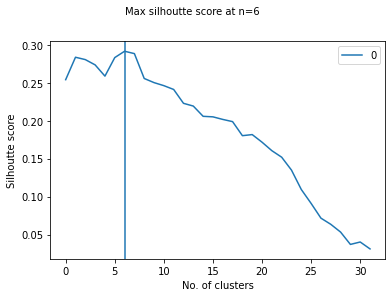

In [120]:
dropouts_x = create_aggregate(dropout)
dropouts_result=create_clusters(dropouts_x,['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL'])
dropouts_clusters=return_clusters(dropouts_result)
dropouts_clusters

In [121]:
reqd=dropouts_result.groupby('Labels')[dropouts_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='Greens')

,PRIMARY_BOYS,PRIMARY_GIRLS,PRIMARY_TOTAL,UPPER_PRIMARY_BOYS,UPPER_PRIMARY_GIRLS,UPPER_PRIMARY_TOTAL,SECONDARY_BOYS,SECONDARY_GIRLS,SECONDARY_TOTAL,HRSECONDARY_BOYS,HRSECONDARY_GIRLS,HRSECONDARY_TOTAL
Labels,,,,,,,,,,,,
0,1.054444,0.640556,0.851111,1.462778,1.269444,1.148889,8.697778,6.648333,7.716111,15.424444,9.226667,12.514444
1,9.959444,9.827222,9.886111,6.947778,7.926667,7.411111,18.950000,19.767778,19.314444,1.356111,1.429444,1.277778
2,4.269167,3.721667,3.983333,4.805833,4.374167,4.470833,31.999167,32.653333,32.350000,3.160833,1.882500,2.435000
3,2.977500,2.761667,2.862917,3.824583,4.250417,3.887083,19.631667,19.072917,19.407083,8.797500,6.544167,7.630000
4,2.372667,2.242333,2.309667,1.903667,2.351000,1.936333,12.422667,10.443333,11.464333,4.115000,3.519000,3.774000
5,11.878333,11.090000,11.493333,8.618333,9.831667,9.230000,21.203333,20.201667,20.730000,15.030000,11.515000,13.341667


## Enrollments

In [97]:
#enrollments_x = create_aggregate(enrollments)
enrollments_result=create_clusters(enrollments_x,['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total'])
enrollments_clusters=return_clusters(enrollments_result)
enrollments_clusters

KeyboardInterrupt: 

In [66]:
reqd=dropouts_result.groupby('Labels')[dropouts_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='Blues')

,PRIMARY_BOYS,PRIMARY_GIRLS,PRIMARY_TOTAL,UPPER_PRIMARY_BOYS,UPPER_PRIMARY_GIRLS,UPPER_PRIMARY_TOTAL,SECONDARY_BOYS,SECONDARY_GIRLS,SECONDARY_TOTAL,HRSECONDARY_BOYS,HRSECONDARY_GIRLS,HRSECONDARY_TOTAL
Labels,,,,,,,,,,,,
0,2.575000,2.550556,2.561667,1.906111,2.535833,2.049167,12.253056,10.674444,11.482222,4.198889,3.453333,3.797778
1,2.216667,1.985556,2.084444,3.525556,3.204444,3.210000,33.901111,33.630000,33.771111,2.826667,1.251111,1.921111
2,12.650000,12.133333,12.398333,5.363333,6.978333,6.175000,13.641667,13.803333,13.745000,9.175000,8.035000,8.621667
3,0.280000,0.295833,0.277500,1.140833,0.950833,0.721667,7.610833,5.122500,6.445833,17.629167,9.943333,14.082500
4,10.330000,9.690556,10.010000,8.924444,9.190556,9.053889,23.383333,24.190556,23.773889,4.001667,3.218889,3.513889
5,3.168148,2.692593,2.931481,3.807778,4.100370,3.820370,18.978148,18.256296,18.658519,9.241481,6.854444,7.995926


## Other factors

In [83]:
factors_result=create_clusters(factor)
factors_clusters=return_clusters(factors_result)
factors_clusters

,State,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
0,Andaman & Nicobar Islands,98.69,88.86,53.06,94.52,93.44
1,Andhra Pradesh,90.35,90.34,29.57,56.88,81.31
2,Arunachal Pradesh,79.79,36.35,24.28,48.73,76.90
3,Assam,80.30,19.39,8.85,60.17,75.28
4,Bihar,92.53,9.96,5.47,73.42,75.41
5,Chandigarh,100.00,100.00,95.83,100.00,100.00
6,Chhattisgarh,95.47,57.28,9.80,82.85,94.10
7,Dadra & Nagar Haveli,100.00,96.79,38.19,85.53,94.36
8,Daman & Diu,100.00,100.00,61.11,100.00,100.00
9,Delhi,100.00,100.00,81.56,100.00,100.00


In [ ]:
reqd=factors_result.groupby('Labels')[factors_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='Pink')

In [82]:
if __name__== '__main__':
    enrollments,factors=init_format(enrollments,drinks,electricity,computers,boys_toilet,girls_toilet)
